# [TEST] PDDLStream-test-samples-ikmp-analysis-comparemine-print

In [ ]:
# # python3 /home/rnb/Projects/rnb-planning/src/pkg/planning/filtering/lattice_model/shared_lattice_predictor.py --rtype panda

# import SharedArray as sa
# ROBOT_TYPE_NAME = 'panda'
# sa.delete("shm://{}.prepared".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.grasp_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.arm_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.rh_vals".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.result".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_in".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.response_out".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_quit".format(ROBOT_TYPE_NAME))

#### Rebuild matploblib.font manager if font error occurs

In [1]:
# import matplotlib
# matplotlib.font_manager._rebuild()

In [1]:
from __future__ import print_function
import os
import sys
RNB_PLANNING_DIR = os.environ["RNB_PLANNING_DIR"]
sys.path.append(os.path.join(RNB_PLANNING_DIR, 'src'))
from pkg.controller.combined_robot import *
from pkg.utils.utils import get_now, try_mkdir
import subprocess

DATA_PATH = os.path.join(RNB_PLANNING_DIR, "data")
try_mkdir(DATA_PATH)

DAT_ROOT = "stowing-deep"
TEST_DATA_PATH = os.path.join(DATA_PATH, DAT_ROOT)
try_mkdir(TEST_DATA_PATH)

In [2]:
def combine_by_obsnum(value_dict, keys=[3, 5, 7]):
    value_dict_new = {}
    for k in keys:
        k1 = 'obj_1c_obs{}'.format(k)
        k2 = 'obj_3c_obs{}'.format(k)
        value_dict_new[k] = {}
        for cname in value_dict[k1].keys():
            value_dict_new[k][cname] = np.concatenate([value_dict[k1][cname], value_dict[k2][cname]])
    return value_dict_new

## plot results

In [3]:
from plot_scripts import *
RTYPE = "panda"
DAT_DIR = '20210917-113211'
CNAME_LIST = ["None", "Full"]
LEGEND_LIST = ["None", "Step3"]
IK_NUMS = [1,2,4,8,16, 32, 64]
RESULT_PATHS = []
IK_DIR_FORM = "stowing-deep-result-analysis-ik{:03}-mp2fix"
for ik_num in IK_NUMS:
    RES_ROOT = IK_DIR_FORM.format(ik_num)
    TEST_RESULT_PATH = os.path.join(DATA_PATH, RES_ROOT)
    try_mkdir(TEST_RESULT_PATH)
    RESULT_PATHS.append(RES_ROOT)

In [4]:
success_means_dict = {}
time_means_dict = {}
time_stds_dict = {}

succ_dict_all = {}
time_dict_all = {}
for ik_num in IK_NUMS:
    resdat_all, res_dict_all = print_results(RES_ROOT=IK_DIR_FORM.format(ik_num), 
                                             RTYPE="panda", 
                                             DAT_DIR='20210917-113211',
                                             CNAMES_EXCLUDE=[], read_only=True
                                            )
#     succ_dict_all[ik_num] = swap_double_dict(combine_by_obsnum(extract_values(resdat_all, ["success"])))
#     time_dict_all[ik_num] = swap_double_dict(combine_by_obsnum(extract_valid(resdat_all, keys=["plan_time"], individual=True)))
    succ_dict_all[ik_num] = swap_double_dict(extract_values(resdat_all, ["success"]))
    time_dict_all[ik_num] = swap_double_dict(extract_valid(resdat_all, keys=["plan_time"], individual=True))
    
succ_dict_all = swap_double_dict(succ_dict_all)
time_dict_all = swap_double_dict(time_dict_all)

RES_ROOT: stowing-deep-result-analysis-ik001-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik002-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik004-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik008-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik016-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik032-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik064-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']


In [5]:
for cname in CNAME_LIST:
    succ_dict = swap_double_dict(succ_dict_all[cname])
    time_dict = swap_double_dict(time_dict_all[cname])
    success_vecs = [np.concatenate(map(lambda case: succ_dict[case][ik_num], sorted(succ_dict.keys()))) for ik_num in IK_NUMS]
    success_means = map(np.mean, success_vecs)
    time_vecs = [np.concatenate(map(lambda case: time_dict[case][ik_num], sorted(time_dict.keys()))) for ik_num in IK_NUMS]
    time_means = np.array(map(np.mean, time_vecs))
    time_stds = np.array(map(np.std, time_vecs))
    success_means_dict[cname] = success_means
    time_means_dict[cname] = time_means
    time_stds_dict[cname] = time_stds

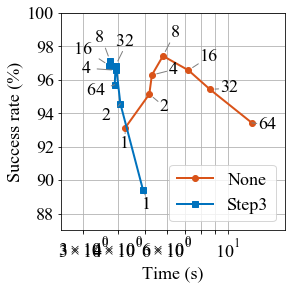

In [6]:
plt.rcParams['font.size'] = 18
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['lines.linewidth'] = 2

fig = plt.figure(figsize=(4,4))
ax = plt.subplot(1,1,1)

pargs_list = []
time_means_all, success_means_all, labels_all = [], [], []
for i_c, (cname, lstyle, color) in enumerate(zip(CNAME_LIST, ['-o', '-s'], [MATLAB_COLORS[1], MATLAB_COLORS[0]])):
    success_means = np.multiply(success_means_dict[cname], 100)
    time_means = time_means_dict[cname]
    time_stds = time_stds_dict[cname]
    pargs_list.append((time_means, success_means, lstyle))
    time_means_all += list(time_means)
    success_means_all += list(success_means)
    labels_all += list(map(lambda x: str(x)+" "*i_c, IK_NUMS))
    plt.plot(time_means, success_means, lstyle, color=color) 
#     repel_labels(ax, time_means, success_means, IK_NUMS, k=0.35,arrowstyle='-', autoset_axis=False)   
    
repel_labels(ax, time_means_all, success_means_all, labels_all, k=0.5, 
             color='gray', arrowstyle='-', autoset_axis=False,
             min_shift=0.8, max_shift=1.2, min_x=2.5, scale_y=1.5)
    
plt.xscale("log", basex=10)
plt.xticks(range(3,11))
plt.yticks(range(70,102, 2))
plt.grid(True)
plt.axis([2.5, 16, 87, 100])
plt.xlabel("Time (s)")
plt.ylabel("Success rate (%)")

    
plt.legend(LEGEND_LIST, loc="lower right")
plt.show()

In [7]:
print("".join(["{:8}".format(x) for x in IK_NUMS]))
print("".join(["{:8}".format(x) 
               for x in np.round((1-np.divide(time_means_all[7:], time_means_all[:7]))*100, 2)]))
print("".join(["{:8}".format(x) 
               for x in np.round(time_means_all[7:], 2)]))
print("".join(["{:8}".format(x) 
               for x in np.round(time_means_all[:7], 2)]))

       1       2       4       8      16      32      64
  -15.78   21.38   25.48   35.61   48.28   54.39   68.04
    4.93    4.09    3.96    3.75    3.72    3.93     3.9
    4.26     5.2    5.31    5.82     7.2    8.61   12.19


In [8]:
print("".join(["{:8}".format(x) for x in IK_NUMS]))
print("".join(["{:8}".format(x) 
               for x in np.round(success_means_all[7:], 2)]))
print("".join(["{:8}".format(x) 
               for x in np.round(success_means_all[:7], 2)]))

       1       2       4       8      16      32      64
   89.43   94.57   96.57   97.14   96.86   96.86   95.71
   93.14   95.14   96.29   97.43   96.57   95.43   93.43


# MP analysis

In [9]:
from plot_scripts import *
RTYPE = "panda"
DAT_DIR = '20210917-113211'
CNAME_LIST = ["None", "Full"]
LEGEND_DICT = {"None": "None", "Full": "Step3"}
IK_TRY_NUM = 8
MP_TIMES = [0.1,0.2,0.5,1.0,2.0,4.0,8.0]
RESULT_PATHS = []
MP_DIR_FORM = "stowing-deep-result-analysis-ik{:03}_mp{:.3}"
for mp_time in MP_TIMES:
    RES_ROOT = MP_DIR_FORM.format(IK_TRY_NUM, mp_time)
    TEST_RESULT_PATH = os.path.join(DATA_PATH, RES_ROOT)
    try_mkdir(TEST_RESULT_PATH)
    RESULT_PATHS.append(RES_ROOT)

In [10]:
succ_dict_all = {}
time_dict_all = {}
for mp_time in MP_TIMES:
    resdat_all, res_dict_all = print_results(RES_ROOT=MP_DIR_FORM.format(IK_TRY_NUM, mp_time), 
                                             RTYPE="panda", 
                                             DAT_DIR='20210917-113211',
                                             CNAMES_EXCLUDE=[], read_only=True
                                            )
#     succ_dict_all[mp_time] = swap_double_dict(combine_by_obsnum(extract_values(resdat_all, ["success"])))
#     time_dict_all[mp_time] = swap_double_dict(combine_by_obsnum(extract_valid(resdat_all, keys=["plan_time"], individual=True)))
    succ_dict_all[mp_time] = swap_double_dict(extract_values(resdat_all, ["success"]))
    time_dict_all[mp_time] = swap_double_dict(extract_valid(resdat_all, keys=["plan_time"], individual=True))
    
succ_dict_all = swap_double_dict(succ_dict_all)
time_dict_all = swap_double_dict(time_dict_all)

RES_ROOT: stowing-deep-result-analysis-ik008_mp0.1
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik008_mp0.2
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik008_mp0.5
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik008_mp1.0
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik008_mp2.0
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik008_mp4.0
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik008_mp8.0
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']


In [11]:
for cname in CNAME_LIST:
    succ_dict = swap_double_dict(succ_dict_all[cname])
    time_dict = swap_double_dict(time_dict_all[cname])
    success_vecs = [np.concatenate(map(lambda case: succ_dict[case][mp_time], sorted(succ_dict.keys()))) for mp_time in MP_TIMES]
    success_means = map(np.mean, success_vecs)
    time_vecs = [np.concatenate(map(lambda case: time_dict[case][mp_time], sorted(time_dict.keys()))) for mp_time in MP_TIMES]
    time_means = np.array(map(np.mean, time_vecs))
    time_stds = np.array(map(np.std, time_vecs))
    success_means_dict[cname] = success_means
    time_means_dict[cname] = time_means
    time_stds_dict[cname] = time_stds

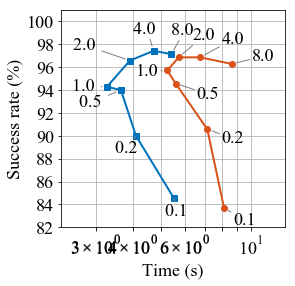

In [12]:
plt.rcParams['font.size'] = 18
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['lines.linewidth'] = 2

fig = plt.figure(figsize=(4,4))
ax = plt.subplot(1,1,1)

pargs_list = []
time_means_all, success_means_all, labels_all = [], [], []
for i_c, (cname, lstyle, color) in enumerate(zip(CNAME_LIST, ['-o', '-s'], [MATLAB_COLORS[1], MATLAB_COLORS[0]])):
    success_means = np.multiply(success_means_dict[cname], 100)
    time_means = time_means_dict[cname]
    time_stds = time_stds_dict[cname]
    pargs_list.append((time_means, success_means, lstyle))
    time_means_all += list(time_means)
    success_means_all += list(success_means)
    labels_all += list(map(lambda x: str(x)+" "*i_c, MP_TIMES))
    plt.plot(time_means, success_means, lstyle, color=color) 
#     repel_labels(ax, time_means, success_means, IK_NUMS, k=0.1,arrowstyle='-', autoset_axis=False)    
    
repel_labels(ax, time_means_all, success_means_all, labels_all, k=0.8, 
             color='gray', arrowstyle='-', autoset_axis=False,
             min_shift=1.2, max_shift=1.7, min_x=2.5, scale_y=1.3)
    
plt.xscale("log", basex=10)
# plt.xticks(np.power(2, range(1,5)))
plt.xticks(range(3,11))
plt.yticks(range(70,102, 2))
plt.grid(True)
plt.axis([2.3, 13, 82, 101])
plt.xlabel("Time (s)")
plt.ylabel("Success rate (%)")

    
# plt.legend(LEGEND_LIST, loc="lower left")
plt.show()

In [13]:
print("".join(["{:8}".format(x) for x in MP_TIMES]))
print("".join(["{:8}".format(x) 
               for x in np.round((1-np.divide(time_means_all[7:], time_means_all[:7]))*100, 2)]))
print("".join(["{:8}".format(x) 
               for x in np.round(time_means_all[7:], 2)]))
print("".join(["{:8}".format(x) 
               for x in np.round(time_means_all[:7], 2)]))

     0.1     0.2     0.5     1.0     2.0     4.0     8.0
   32.31    42.5   34.63   37.31   31.58   30.37   37.45
     5.5    4.11    3.65    3.28    3.91    4.71    5.39
    8.13    7.14    5.59    5.23    5.72    6.76    8.62


In [14]:
print("".join(["{:8}".format(x) for x in MP_TIMES]))
print("".join(["{:8}".format(x) 
               for x in np.round(success_means_all[7:], 2)]))
print("".join(["{:8}".format(x) 
               for x in np.round(success_means_all[:7], 2)]))

     0.1     0.2     0.5     1.0     2.0     4.0     8.0
   84.57    90.0    94.0   94.29   96.57   97.43   97.14
   83.71   90.57   94.57   95.71   96.86   96.86   96.29
